<a href="https://colab.research.google.com/github/SandeepAswathnarayana/mooc/blob/master/coursera/IBM%20Data%20Science%20Professional%20Certificate/Applied%20Data%20Science%20Capstone/The_Battle_of_Neighborhoods_(Week_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://www.researchgate.net/profile/Valerie_Womack/publication/289670291/figure/fig4/AS:666603662348288@1535942106313/Dallas-Police-Department-patrol-division-boundaries-2009_W640.jpg")
Image(url= "https://res.cloudinary.com/culturemap-com/image/upload/ar_4:3,c_fill,g_faces:center,w_1200/v1491756896/photos/105147_original.jpg")

In [0]:
Image(url= "https://www.researchgate.net/profile/Valerie_Womack/publication/289670291/figure/fig4/AS:666603662348288@1535942106313/Dallas-Police-Department-patrol-division-boundaries-2009_W640.jpg")

# Problem:

# Target Audience:

# Data and Data Sources:

# Methodology:

# Results:

# Discussion:

# Conclusion:

In [3]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # To convert an address into latitude and longitude values

from bs4 import BeautifulSoup # To parse HTML and XML documents
from urllib.request import urlopen
import requests # To handle requests
from pandas.io.json import json_normalize # Tranform JSON file into a pandas dataframe

import xml

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans # Import K-Means from clustering 

!conda install -c conda-forge folium=0.5.0 --yes
import folium # To generate Leaflet maps

print('Libraries imported.')

/bin/bash: conda: command not found
/bin/bash: conda: command not found
Libraries imported.


In [4]:
import pandas as pd
dallas_crime = pd.read_json ('https://www.dallasopendata.com/resource/qv6i-rri7.json')
dallas_crime.head()

,incidentnum,servyr,servnumid,watch,signal,offincident,premise,objattack,incident_address,ra,beat,division,sector,district,date1,year1,month1,day1,time1,date1dayofyear,date2_of_occurrence_2,year2,month2,day2,time2,date2dayofyear,reporteddate,edate,eyear,emonth,eday,etime,edatedayofyear,cfs_number,callorgdate,callreceived,callcleared,calldispatched,involvement,victimtype,compname,comprace,compethnicity,compsex,comphaddress,comphzipcode,compcity,compstate,ro1badge,ro1name,ro2badge,ro2name,reptoff,assoffbadge,reviewbadgenum,elenum,followup1,followup2,status,ucr_disp,mo,family,hatecrimedescriptn,drug,offensecode,cjis,penalcode,nibrs_crime,nibrs_crime_category,nibrs_crimeagainst,nibrs_code,nibrs_group,nibrs_type,upzdate,x_coordinate,y_cordinate,zip_code,city,state,geocoded_column,:@computed_region_sjyw_rtbm,:@computed_region_2f7u_b5gs,comphapt,weaponused,gang,ucr_offense,ucr_offdesc,ucrcode,type,taag,community,compage,compageatoffensetime,compbusname,compbaddress,apt,victimcond,victiminjurydesc,compbphone,hate,splrpt
0,237372-2019,2019,237372-2019-01,3,09V - UUMV,UNAUTHORIZED USE OF MOTOR VEH - AUTOMOBILE,"Highway, Street, Alley ETC",N/A,6323 ROYALTON DR,1045.0,651,NORTH CENTRAL,650,D11,2019-11-24T00:00:00.000,2019,November,Sun,20:00,328,2019-11-24T00:00:00.000,2019,November,Sun,20:21,328,2019-11-24T21:09:00.000,2019-11-24T20:35:12.000,2019,November,Sun,20:35,328,19-2221102,2019-11-24T19:24:10.000,2019-11-24T19:24:09.000,2019-11-24T22:13:46.000,2019-11-24T20:00:24.000,Registered Owner,Individual,"NEUHOFF, KATHLEEN, ELIZABETH",White,Non-Hispanic or Latino,Female,6323 ROYALTON DR,75230.0,DALLAS,TX,11661,"ROBINSON,JARRETT,MARQUEZ",9168.0,"BENNERS,KIRK,EDWARD",11661,T270,81075.0,E654,Investigations,Special Investigations / Auto Theft,Suspended,Suspended,UNKNOWN TOOK VEHICLE WITHOUT THE OWNERS CONSENT.,0.0,None,No,FS-24110003-G1,24110003,PC 31.07,UUMV,MOTOR VEHICLE THEFT,PROPERTY,240,A,Coded,2019-11-26 12:23:04.0000000,2.490957e+06,7.013986e+06,75230,DALLAS,TX,"{'latitude': '32.898015', 'longitude': '-96.79...",10.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,011228-2019,2019,011228-2019-01,2,42 - CHASE,EVADING ARREST DETENTION W/VEHICLE PC38.04(b)(...,"Highway, Street, Alley ETC",N/A,669 AIRPORT FWY,NaN,151,CENTRAL,150,NaN,2019-01-17T00:00:00.000,2019,January,Thu,10:41,17,2019-01-17T00:00:00.000,2019,January,Thu,11:16,17,2019-01-17T14:56:00.000,2019-01-17T11:39:32.000,2019,January,Thu,11:39,17,19-0099145,2019-01-17T10:44:19.000,2019-01-17T10:44:19.000,2019-01-17T18:22:46.000,2019-01-17T10:44:19.000,Victim,Government,CITY OF DALLAS,NaN,NaN,NaN,9915 E NORTHWEST HWY,75238.0,DALLAS,TX,10135,"BALLARD,ANDREW,DAVID",8915.0,"TERRY,MATTHEW,WILLIAM",10135,8283,121171.0,B292,Strategic Development,Field Services / Vehicle Crimes Unit,Suspended,Suspended,SUSP FLED IN VEHICLE,0.0,None,No,F3-48010020-U275,48010020,PC 38.04(b)(2)(A),ALL OTHER OFFENSES,ALL OTHER OFFENSES,"PERSON, PROPERTY, OR SOCIETY",90Z,B,No Coded,2019-01-24 14:38:00.0000000,NaN,NaN,75215,HURST,TX,"{'latitude': '32.839234', 'longitude': '-97.18...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,270366-2017,2017,270366-2017-01,1,09V - UUMV,UNAUTHORIZED USE OF MOTOR VEH - AUTOMOBILE,Parking Lot (All Others),N/A,13929 N CENTRAL EXPY,4522.0,644,NORTH CENTRAL,640,D11,2017-11-25T00:00:00.000,2017,November,Sat,08:00,329,2017-11-27T00:00:00.000,2017,November,Mon,14:00,331,2017-11-27T23:00:00.000,2017-11-28T00:21:58.000,2017,November,Tue,00:21,332,17-2248386,2017-11-27T23:00:16.000,2017-11-27T23:00:15.000,2017-11-28T01:05:58.000,2017-11-27T23:43:14.000,Registered Owner,NaN,"BROWN, ANTONIO, JEROME",Black,Non-Hispanic or Latino,Male,13740 MONTFORT DR APT 2123,75240.0,DALLAS,TX,10407,"PEREZ,YAHIR",NaN,NaN,10407,9437,109373.0,A624,Investigations,Special Investigations / Auto Theft,Suspended,Suspended,UKN SUSP TOOK COMPS VEHICLE WITHOUT CONSENT,0.0,None,No,FS-24110003-G1,24110003,PC 31.07,UUMV,MOTOR VEHICLE THEFT,PROPERTY

### Let's rename the columns of interest, while still keeping the original dataframe

In [5]:
dallas_crime.rename(columns = {'servyr':'Year of Incident', 'watch':'Watch', 'offincident':'Type of Incident', 'premise':'Type Location', 'incident_address':'Incident Address', 'division':'Division', 'taag':'Target Area Action Grids', 'date1':'Date1 of Occurence', 'time1':'Time1 of Occurence', 'reporteddate':'Date of Report', 'callorgdate':'Call Received Date Time', 'victimtype':'Victim Type', 'comprace':'Victim Race', 'compsex':'Victim Gender', 'compageatoffensetime':'Victim Age at Offense', 'comphzipcode':'Victim Zipcode', 'status':'Offense Status', 'mo':'Modus Operandi (MO)', 'drug':'Drug Related Incident', 'x_coordinate':'X Coordinate', 'y_cordinate':'Y Coordinate', 'zip_code':'Zip Code', 'incidentnum':'Incident Number w/year', 'signal':'Call (911) Problem'}, inplace = True)

dallas_crime.head()

,Incident Number w/year,Year of Incident,servnumid,Watch,Call (911) Problem,Type of Incident,Type Location,objattack,Incident Address,ra,beat,Division,sector,district,Date1 of Occurence,year1,month1,day1,Time1 of Occurence,date1dayofyear,date2_of_occurrence_2,year2,month2,day2,time2,date2dayofyear,Date of Report,edate,eyear,emonth,eday,etime,edatedayofyear,cfs_number,Call Received Date Time,callreceived,callcleared,calldispatched,involvement,Victim Type,compname,Victim Race,compethnicity,Victim Gender,comphaddress,Victim Zipcode,compcity,compstate,ro1badge,ro1name,ro2badge,ro2name,reptoff,assoffbadge,reviewbadgenum,elenum,followup1,followup2,Offense Status,ucr_disp,Modus Operandi (MO),family,hatecrimedescriptn,Drug Related Incident,offensecode,cjis,penalcode,nibrs_crime,nibrs_crime_category,nibrs_crimeagainst,nibrs_code,nibrs_group,nibrs_type,upzdate,X Coordinate,Y Coordinate,Zip Code,city,state,geocoded_column,:@computed_region_sjyw_rtbm,:@computed_region_2f7u_b5gs,comphapt,weaponused,gang,ucr_offense,ucr_offdesc,ucrcode,type,Target Area Action Grids,community,compage,Victim Age at Offense,compbusname,compbaddress,apt,victimcond,victiminjurydesc,compbphone,hate,splrpt
0,237372-2019,2019,237372-2019-01,3,09V - UUMV,UNAUTHORIZED USE OF MOTOR VEH - AUTOMOBILE,"Highway, Street, Alley ETC",N/A,6323 ROYALTON DR,1045.0,651,NORTH CENTRAL,650,D11,2019-11-24T00:00:00.000,2019,November,Sun,20:00,328,2019-11-24T00:00:00.000,2019,November,Sun,20:21,328,2019-11-24T21:09:00.000,2019-11-24T20:35:12.000,2019,November,Sun,20:35,328,19-2221102,2019-11-24T19:24:10.000,2019-11-24T19:24:09.000,2019-11-24T22:13:46.000,2019-11-24T20:00:24.000,Registered Owner,Individual,"NEUHOFF, KATHLEEN, ELIZABETH",White,Non-Hispanic or Latino,Female,6323 ROYALTON DR,75230.0,DALLAS,TX,11661,"ROBINSON,JARRETT,MARQUEZ",9168.0,"BENNERS,KIRK,EDWARD",11661,T270,81075.0,E654,Investigations,Special Investigations / Auto Theft,Suspended,Suspended,UNKNOWN TOOK VEHICLE WITHOUT THE OWNERS CONSENT.,0.0,None,No,FS-24110003-G1,24110003,PC 31.07,UUMV,MOTOR VEHICLE THEFT,PROPERTY,240,A,Coded,2019-11-26 12:23:04.0000000,2.490957e+06,7.013986e+06,75230,DALLAS,TX,"{'latitude': '32.898015', 'longitude': '-96.79...",10.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,011228-2019,2019,011228-2019-01,2,42 - CHASE,EVADING ARREST DETENTION W/VEHICLE PC38.04(b)(...,"Highway, Street, Alley ETC",N/A,669 AIRPORT FWY,NaN,151,CENTRAL,150,NaN,2019-01-17T00:00:00.000,2019,January,Thu,10:41,17,2019-01-17T00:00:00.000,2019,January,Thu,11:16,17,2019-01-17T14:56:00.000,2019-01-17T11:39:32.000,2019,January,Thu,11:39,17,19-0099145,2019-01-17T10:44:19.000,2019-01-17T10:44:19.000,2019-01-17T18:22:46.000,2019-01-17T10:44:19.000,Victim,Government,CITY OF DALLAS,NaN,NaN,NaN,9915 E NORTHWEST HWY,75238.0,DALLAS,TX,10135,"BALLARD,ANDREW,DAVID",8915.0,"TERRY,MATTHEW,WILLIAM",10135,8283,121171.0,B292,Strategic Development,Field Services / Vehicle Crimes Unit,Suspended,Suspended,SUSP FLED IN VEHICLE,0.0,None,No,F3-48010020-U275,48010020,PC 38.04(b)(2)(A),ALL OTHER OFFENSES,ALL OTHER OFFENSES,"PERSON, PROPERTY, OR SOCIETY",90Z,B,No Coded,2019-01-24 14:38:00.0000000,NaN,NaN,75215,HURST,TX,"{'latitude': '32.839234', 'longitude': '-97.18...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,270366-2017,2017,270366-2017-01,1,09V - UUMV,UNAUTHORIZED USE OF MOTOR VEH - AUTOMOBILE,Parking Lot (All Others),N/A,13929 N CENTRAL EXPY,4522.0,644,NORTH CENTRAL,640,D11,2017-11-25T00:00:00.000,2017,November,Sat,08:00,329,2017-11-27T00:00:00.000,2017,November,Mon,14:00,331,2017-11-27T23:00:00.000,2017-11-28T00:21:58.000,2017,November,Tue,00:21,332,17-2248386,2017-11-27T23:00:16.000,2017-11-27T23:00:15.000,2017-11-28T01:05:58.000,2017-11-27T23:43:14.000,Registered Owner,NaN,"BROWN, ANTONIO, JEROME",Black,Non-Hispanic or Latino,Male,13740 MONTFORT DR APT 2123,75240.0,DALLAS,TX,10407,"PEREZ,YAHIR",NaN,NaN,10407,9437,109373.0,A624,Investigations,Special Investigat

### Let's start analyzing the numeric columns in the dataframe

In [6]:
dallas_crime.describe()

,Year of Incident,Watch,ra,beat,sector,year1,date1dayofyear,year2,date2dayofyear,eyear,edatedayofyear,Victim Zipcode,ro2badge,reviewbadgenum,family,cjis,X Coordinate,Y Coordinate,Zip Code,:@computed_region_sjyw_rtbm,:@computed_region_2f7u_b5gs,ucrcode,compage,Victim Age at Offense,compbphone
count,1000.000000,1000.00000,999.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,890.000000,297.000000,996.000000,904.0,1.000000e+03,9.990000e+02,9.990000e+02,1000.000000,941.000000,943.000000,177.000000,611.00000,558.000000,1.000000e+01
mean,2018.532000,1.87700,3198.048048,410.70800,406.810000,2018.50700,240.777000,2018.525000,238.365000,2018.532000,238.308000,74642.720225,9792.127946,82886.264056,0.0,2.903713e+07,2.494558e+06,6.979279e+06,75224.739000,7.020191,2.996819,810.576271,38.07365,38.327957,5.431657e+09
std,1.055505,0.85358,1878.976456,199.29699,199.379227,1.07662,96.247945,1.060424,98.657007,1.055505,99.392817,6281.336713,1411.262384,37650.624033,0.0,2.102839e+07,2.224491e+04,3.120815e+04,19.710235,3.932762,0.072785,443.409064,14.18968,14.235199,3.774743e+09
min,2014.000000,1.00000,1001.000000,111.00000,110.000000,2014.00000,1.000000,2014.000000,1.000000,2014.000000,1.000000,0.000000,4920.000000,3366.000000,0.0,1.299000e+07,2.440483e+06,6.915508e+06,75081.000000,1.000000,1.000000,300.000000,8.00000,17.000000,2.142132e+09
25%,2018.000000,1.00000,1254.500000,232.00000,230.000000,2018.00000,198.000000,2018.000000,188.000000,2018.000000,187.500000,75206.000000,9085.000000,54292.000000,0.0,2.299000e+07,2.478620e+06,6.956686e+06,75211.000000,4.000000,3.000000,690.000000,27.00000,27.000000,2.144604e+09
50%,2019.000000,2.00000,3070.000000,421.00000,420.000000,2019.00000,264.000000,2019.000000,264.000000,2019.000000,264.000000,75220.000000,10116.000000,105273.000000,0.0,2.399019e+07,2.492192e+06,6.977501e+06,75224.000000,7.000000,3.000000,710.000000,35.00000,35.000000,3.423191e+09
75%,2019.000000,3.00000,4338.000000,552.00000,550.000000,2019.00000,317.000000,2019.000000,319.000000,2019.000000,319.000000,75236.000000,10961.000000,118185.000000,0.0,2.411000e+07,2.506645e+06,7.002085e+06,75235.000000,11.000000,3.000000,720.000000,48.00000,48.000000,9.722411e+09
max,2020.000000,3.00000,9611.000000,757.00000,750.000000,2020.00000,365.000000,2020.000000,363.000000,2020.000000,364.000000,93108.000000,11591.000000,123375.000000,0.0,1.000000e+08,2.576316e+06,7.056371e+06,75287.000000,14.000000,3.000000,2600.000000,89.00000,89.000000,9.726630e+09


In [13]:
dallas_crime['Incident Count'] = np.arange(len(dallas_crime))
dallas_crime['Incident Count'].head()

Index_Num
0    0
1    1
2    2
3    3
4    4
Name: Incident Count, dtype: int64

In [14]:
dallas_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 102 entries, Incident Number w/year to Incident Count
dtypes: float64(13), int64(13), object(76)
memory usage: 797.0+ KB


In [15]:
division_count = dallas_crime.groupby(['Division']).size().to_frame(name='Count').reset_index()
division_count

,Division,Count
0,CENTRAL,175
1,NORTH CENTRAL,104
2,NORTHEAST,155
3,NORTHWEST,162
4,NorthEast,2
5,SOUTH CENTRAL,124
6,SOUTHEAST,137
7,SOUTHWEST,141


In [16]:
division_count.rename(index=str, columns={'Count':'Division_Count'}, inplace=True)
division_count

,Division,Division_Count
0,CENTRAL,175
1,NORTH CENTRAL,104
2,NORTHEAST,155
3,NORTHWEST,162
4,NorthEast,2
5,SOUTH CENTRAL,124
6,SOUTHEAST,137
7,SOUTHWEST,141


In [17]:
year_count = dallas_crime.groupby(['Year of Incident']).size().to_frame(name='Count').reset_index()
year_count

,Year of Incident,Count
0,2014,26
1,2015,12
2,2016,16
3,2017,34
4,2018,192
5,2019,702
6,2020,18


In [18]:
year_count.rename(index=str, columns={'Count':'Year of Incident_Count'}, inplace=True)
year_count

,Year of Incident,Year of Incident_Count
0,2014,26
1,2015,12
2,2016,16
3,2017,34
4,2018,192
5,2019,702
6,2020,18


### What type of incidents does Dallas PD mostly deal with? Is there a specific pattern which the Poilicy Makers, Citizens and Law Makers can take note of?

In [19]:
type_of_incident = dallas_crime.groupby(['Type of Incident']).size().to_frame(name='Count').reset_index()
type_of_incident.sort_values(by=['Count'], ascending=False)

,Type of Incident,Count
87,UNAUTHORIZED USE OF MOTOR VEH - AUTOMOBILE,150
10,BMV,134
15,BURGLARY OF HABITATION - FORCED ENTRY,69
89,UNAUTHORIZED USE OF MOTOR VEH - TRUCK OR BUS,54
13,BURGLARY OF BUILDING - FORCED ENTRY,54
52,ROBBERY OF INDIVIDUAL (AGG),47
19,CRIM MISCHIEF > OR EQUAL $100 < $750,40
2,ASSAULT (AGG) -DEADLY WEAPON,35
16,BURGLARY OF HABITATION -NO FORCED ENTRY,29
78,"THEFT OF PROP > OR EQUAL $750 <$2,500 (NOT SHO...",25


In [20]:
type_of_incident.rename(index=str, columns={'Count':'Type of Incident_Count'}, inplace=True)
type_of_incident

,Type of Incident,Type of Incident_Count
0,ABANDONED PROPERTY (NO OFFENSE),1
1,ASSAULT (AGG) -AGAINST SECURITY OFF (AGG),1
2,ASSAULT (AGG) -DEADLY WEAPON,35
3,ASSAULT (AGG) -DISCH FIREARM OCC BLDG/HOUSE/V...,5
4,ASSAULT (AGG) -SERIOUS BODILY INJURY,7
5,ASSAULT -BODILY INJURY ONLY,25
6,ASSAULT -ELD OR DISABLED VIC -BODILY INJURY ONLY,1
7,ASSAULT -ELD OR DISABLED VIC -THREATS,1
8,ASSAULT -OFFENSIVE CONTACT,10
9,ASSAULT -VERBAL THREAT,1


### Printing the top 9 incident types we conclude that the Unauthorized us eof moteor vehicle/automobile and BMV are by far the highest as opposed to othe incident types in Dallas neighborhoods

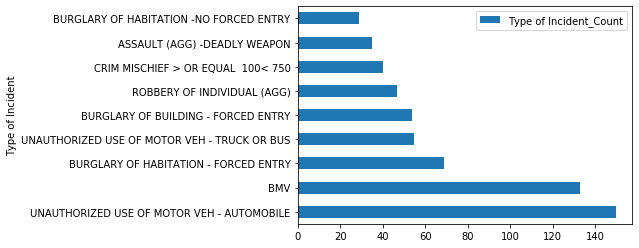

In [21]:
type_of_incident = pd.DataFrame({'Type of Incident':['UNAUTHORIZED USE OF MOTOR VEH - AUTOMOBILE', 'BMV', 'BURGLARY OF HABITATION - FORCED ENTRY', 'UNAUTHORIZED USE OF MOTOR VEH - TRUCK OR BUS', 'BURGLARY OF BUILDING - FORCED ENTRY', 'ROBBERY OF INDIVIDUAL (AGG)', 'CRIM MISCHIEF > OR EQUAL  100< 750', 'ASSAULT (AGG) -DEADLY WEAPON', 'BURGLARY OF HABITATION -NO FORCED ENTRY'], 'Type of Incident_Count':[150, 133, 69, 55, 54, 47, 40, 35, 29]})
ax = type_of_incident.plot.barh(x='Type of Incident', y='Type of Incident_Count')

In [22]:
bmvcrime = dallas_crime.loc[dallas_crime['Type of Incident'] == 'BMV']
bmvcrime[['Division', 'Type of Incident', 'Zip Code', 'X Coordinate', 'Y Coordinate']]

,Division,Type of Incident,Zip Code,X Coordinate,Y Coordinate
Index_Num,,,,,
5,CENTRAL,BMV,75226,2.496649e+06,6.971339e+06
16,NORTHWEST,BMV,75220,2.469779e+06,7.000522e+06
19,CENTRAL,BMV,75202,2.489270e+06,6.971396e+06
29,CENTRAL,BMV,75204,2.490252e+06,6.978153e+06
44,SOUTHEAST,BMV,75227,2.530267e+06,6.962407e+06
58,SOUTHEAST,BMV,75227,2.523867e+06,6.975318e+06
75,SOUTHWEST,BMV,75207,2.486053e+06,6.969538e+06
78,NORTHEAST,BMV,75228,2.525363e+06,6.987369e+06
81,SOUTHEAST,BMV,75227,2.537215e+06,6.966960e+06


In [27]:
bmv_division = bmvcrime.groupby(['Division']).size().to_frame(name='BMV Count').reset_index()
bmv_division

,Division,BMV Count
0,CENTRAL,38
1,NORTH CENTRAL,14
2,NORTHEAST,16
3,NORTHWEST,24
4,SOUTH CENTRAL,8
5,SOUTHEAST,16
6,SOUTHWEST,18


### Based on our generic understanding, the number of crimes are more during late nights It is clearly evident that the number of Police Incidents are directly proportional accordingly i.e., "Watch = 1"

In [28]:
watch_count = dallas_crime.groupby(['Watch']).size().to_frame(name='Watch Count').reset_index()
watch_count

,Watch,Watch Count
0,1,433
1,2,257
2,3,310


### Does Gender play a key role in narrowing down our victims in Dallas?

In [29]:
victim_gender = dallas_crime.groupby(['Victim Gender']).size().to_frame(name='Victim Gender Count').reset_index()
victim_gender

,Victim Gender,Victim Gender Count
0,Female,319
1,Male,375
2,Unknown,1


In [30]:
address = 'Dallas, Texas, USA'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Dallas, Texas is {}, {}.'.format(latitude, longitude))

/usr/local/lib/python3.6/dist-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


The geograpical coordinate of Dallas, Texas is 32.7762719, -96.7968559.


In [32]:
world_geo = r'world_countries.json' # geojson file

dallas_map = folium.Map(location=[32.7762719, -96.7968559], width=1000, height=750,zoom_start=12)

dallas_map

In [41]:
dallas_crime = r'https://www.dallasopendata.com/resource/qv6i-rri7.json'

threshold_scale = np.linspace(dallas_crime['Incident Count'].min(),dallas_crime['Incident Count'].max(), 6,dtype=int)
threshold_scale = threshold_scale.tolist()
threshold_scale[-1] = threshold_scale[-1]+1

dallas_map.choropleth(geo_data=dallas_crime, data=dallas_crime,columns=['Division', 'Incident Count'],
    key_on='feature.properties.Division', threshold_scale=threshold_scale,fill_color='YlOrRd', fill_opacity=0.7, 
    line_opacity=0.1, legend_name='Dallas Divisions')

dallas_map

TypeError: ignored